In [ ]:
import numpy as np
import pandas as pd # just for file loading
import matplotlib.pyplot as plt

In [ ]:
# Load the data
df = pd.read_hdf('data.h5')

In [ ]:
# Look @ the data
df

,x,y
0,1.639249,4.687617
1,-1.752784,5.161865
2,2.400429,4.112924
3,0.061555,-0.858876
4,-1.373990,1.321982
5,-0.121045,-1.567291
6,-1.363448,1.157421
7,-2.206750,12.833504
8,2.938530,-0.308712
9,0.884758,2.554317


In [ ]:
# Put this data in numpy arrays
x = df['x'].values
y = df['y'].values

In [ ]:
# Check the sizes of x and y
print(f"Size of x: {x.size}")
print(f"Size of y: {y.size}")

Size of x: 32
Size of y: 32


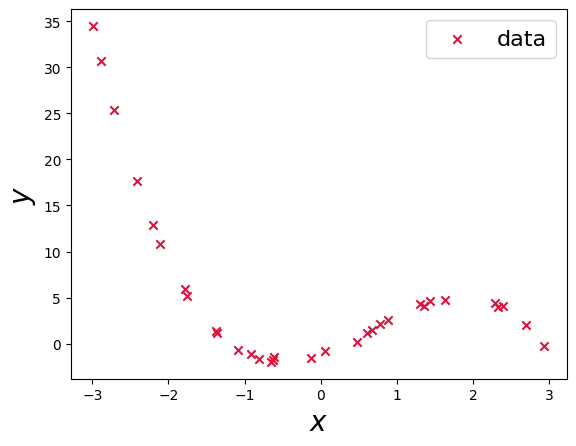

In [ ]:
# Plot the data
plt.scatter(x,y,marker='x',color='crimson',label='data')

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)
plt.legend(fontsize=16)

Step 1: Code up a linear model for a  3rd  degree polynomial.

In [ ]:
# Initialize theta to some random values
# theta = (theta0, theta_1, theta_2, theta_3)

theta = np.random.randn(4,)

In [ ]:
def get_prediction(x, theta):
    '''
    Evaluate a linear model that is a 3rd order polynomial

    fx = theta[0] + theta[1] * x + theta[2] * x^2 + theta[3] * x^3

    Input:
    - x: shape (n,)
    - theta: shape (4,)

    Output:
    - fx: shape (n,)
    '''

    assert theta.shape[0] == 4 # sanity check for 3rd order polynomial

    # Compute the polynomial
    fx = theta[0] + theta[1] * x + theta[2] * x**2 + theta[3] * x**3

    return fx

Step 2a) Calculate the loss

In [ ]:
def get_loss(y_pred, y_true):
    '''
    Calculate the Mean Squared Error (MSE) loss over N examples

    Inputs:
    - y_pred: (n,) array
    - y_true: (n,) array

    Outputs:
    - loss: scalar
    '''

    assert len(y_pred) == len(y_true) # sanity check the inputs make sense

    # Calculate the Mean Squared Error (MSE)
    loss = np.mean((y_pred - y_true) ** 2)

    return loss


In [ ]:
# Example usage:
y_true = np.array([1, 2, 3, 4, 5])  # True values
y_pred = np.array([1.1, 1.9, 3.0, 4.2, 5.1])  # Predicted values

loss = get_loss(y_pred, y_true)
print(f"Mean Squared Error: {loss}")

Mean Squared Error: 0.014000000000000007


In [ ]:
y_pred = get_prediction(x, theta)
loss = get_loss(y_pred,y_true)

AssertionError: 

In [ ]:
y_pred

array([ 2.05908596,  3.67451327,  1.24175972,  0.71925401,  2.04767343,
        0.60291769,  2.01220736,  6.6468726 , -0.66286178,  1.57705602,
        1.39127174,  0.79395583,  0.6201367 ,  1.97648486,  1.94798824,
        1.23778634,  1.12286918,  1.26987297,  1.45879147,  1.34365703,
        0.37405779,  3.82580263,  0.92496454,  0.60803705,  0.63490154,
        2.01471128,  5.87931667, 14.92392215,  1.4815118 , 11.4950036 ,
       13.61391783,  8.43158707])

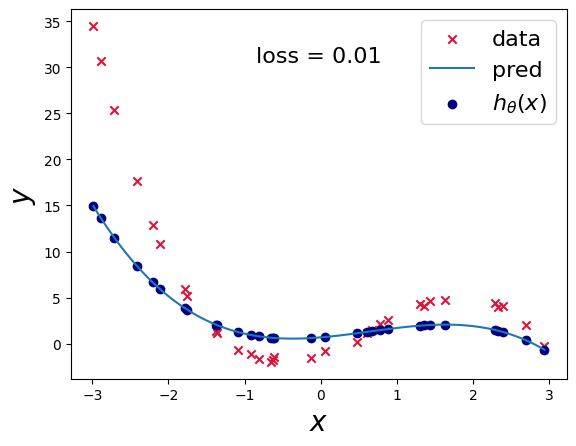

In [ ]:
 #Plot the data and predictions
plt.scatter(x, y, marker='x', color='crimson', label='data')

# Show the "initial guess" for the prediction
xx = np.linspace(min(x), max(x), 100)
f_theta = get_prediction(xx, theta)
plt.plot(xx, f_theta, label='pred')

# Plot h_theta(x) for the data samples
plt.scatter(x, y_pred, marker='o', color='navy', label=r'$h_\theta(x)$')

ax = plt.gca()
plt.text(.5, .9, f'loss = {loss:2.2f}', fontsize=16,
         ha='center', va='top', transform=ax.transAxes)

plt.xlabel('$x$', fontsize=20)
plt.ylabel('$y$', fontsize=20)

plt.legend(fontsize=16)
plt.show()

Step 2b) Gradient of the loss with respect to  θ

In [ ]:
def get_grad(x, y, theta):
    '''
    Code up the gradient of the loss with respect to theta.

    Input:
    - x: array (n,)
    - y: array (n,)
    - theta: (d,)

    Output:
    - dtheta: (d,)
    '''

    assert x.shape[0] == y.shape[0]

    n = x.shape[0]

    # Construct the design matrix X: shape (n, d)
    X = np.column_stack((np.ones(n), x, x**2, x**3))

    # Compute the predictions
    y_pred = X.dot(theta)

    # Compute the gradient
    dtheta = (2/n) * X.T.dot(y_pred - y)

    return dtheta

# Compute the gradient
gradient = get_grad(x, y, theta)
print(f"Gradient: {gradient}")

Gradient: [ -4.76914358   9.06924968 -37.90735046  79.93242886]


Step 3: Set up a training loop to infer the parameters

In [ ]:
alpha=.001

In [ ]:
losses = []

for i in range(1000):

    # Calculate y_pred
    y_pred = get_prediction(x,theta)

    # Get the loss
    loss = get_loss(y_pred,y)

    # Calculate the gradient
    dtheta = get_grad(x,y,theta)

    # Update the parameters
    theta -= alpha * dtheta

    # Save the values
    losses.append(loss)

Text(0, 0.5, 'Loss')

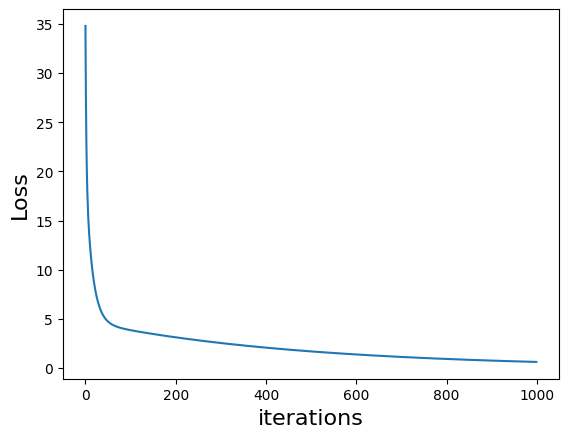

In [ ]:
plt.plot(losses)
plt.xlabel('iterations',fontsize=16)
plt.ylabel('Loss',fontsize=16)

In [ ]:
losses[-10:]

[0.6353755232828919,
 0.6341334600397724,
 0.632893970858645,
 0.6316570503974858,
 0.6304226933253658,
 0.6291908943224371,
 0.627961648079902,
 0.626734949299995,
 0.6255107926959573,
 0.6242891729920145]

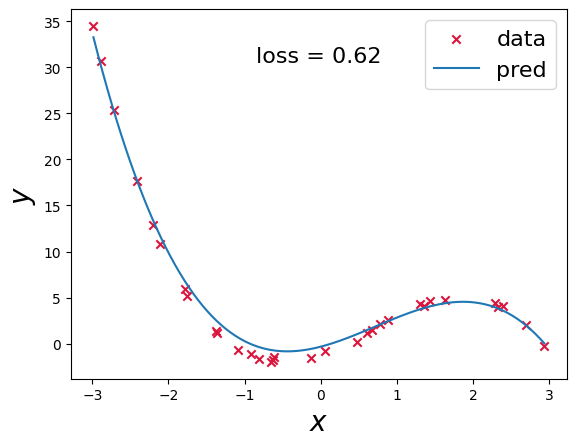

In [ ]:
# Overlay the "initial guess" of the data prediction
y_pred = get_prediction(x,theta)

plt.scatter(x,y,marker='x',color='crimson',label='data')

# plt.scatter(x,y_pred,marker='o',color='navy',label=r'$h_\theta(x)$')

ax = plt.gca()
plt.text(.5,.9,f'loss = {loss:2.2f}',fontsize=16,
         ha='center',va='top',transform=ax.transAxes)

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)

# Get the continuous version of the prediction
f_theta = get_prediction(xx,theta)
plt.plot(xx,f_theta, label='pred' )

plt.legend(fontsize=16)

In [ ]:
theta

array([-0.33701657,  2.15228588,  1.87954751, -0.8748479 ])